In [220]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns 
import scipy
import math
import random 


In [221]:
random.seed(1)

In [223]:
pd.set_option('display.max_columns', 1000)  # or 1000
pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [224]:
raw_concat = pd.read_csv('SST_concat_culled.csv') 

In [225]:
drop_cols = ['Unnamed: 0', 'Allowed', 'Subject', 'StudioVersion', 'leftarrow', 'rightarrow', 'triggercode',
            'Clock.Information', 'DataFile.Basename', 'Display.RefreshRate', 'ExperimentName', 'ExperimentVersion', 
            'Procedure[Block]', 'Procedure[Trial]', 'RandomSeed', 'Running[Block]', 'Running[SubTrial]', 
            'Running[Trial]', 'RuntimeCapabilities', 'RuntimeVersion', 'RuntimeVersionExpected', 'Stimulus']

In [226]:
raw_concat = raw_concat.drop(drop_cols, 1)

Let's fix this up and make some new columns that we need! 

In [222]:
SST_concat = pd.DataFrame()
for i in raw_concat['NARGUID'].unique(): 
    sub = raw_concat.loc[raw_concat['NARGUID'] == i]
    end_trial = sub['SubTrial'] == 1
    begin_second_run = sub['SubTrial'].loc[end_trial].index
    try: 
        sub['SubTrial'].loc[begin_second_run[-1]:] = sub['SubTrial'].loc[begin_second_run[-1]:] + float(sub['SubTrial'].max())
    except IndexError: #because some have the trial num in Trial, not SubTrial
        sub['SubTrial'] = sub['Trial']
        end_trial = sub['SubTrial'] == 1
        print('EXCEPT!:', i)
        begin_second_run = sub['SubTrial'].loc[end_trial].index
        sub['SubTrial'].loc[begin_second_run[-1]:] = sub['SubTrial'].loc[begin_second_run[-1]:] + float(sub['SubTrial'].max())
    SST_concat = SST_concat.append(sub)

/Users/work/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

EXCEPT!: APJKJ5KB
EXCEPT!: LMAAJ8JJ
EXCEPT!: R17JHZRJ


thithe fix.rt and go.rt need to be combined on long rt trials 

In [216]:
fix_rt_mask = (SST_concat['Fix.RESP'].isnull() == False) & (SST_concat['Go.RESP'].isnull())
fix_idx = fix_rt_mask[fix_rt_mask == True].index

In [218]:
SST_concat[['Go.RT', 'Go.RESP', 'Fix.RESP', 'Fix.RT', 'TrialCode']].loc[fix_idx] 

,Go.RT,Go.RESP,Fix.RESP,Fix.RT,TrialCode
23,NaN,NaN,2.0,941.0,IncorrectStop
56,NaN,NaN,2.0,129.0,IncorrectStop
93,0.0,NaN,2.0,40.0,CorrectGo
126,0.0,NaN,1.0,77.0,CorrectGo
135,NaN,NaN,1.0,38.0,IncorrectStop
153,NaN,NaN,2.0,36.0,IncorrectStop
172,NaN,NaN,1.0,458.0,IncorrectStop
179,0.0,NaN,1.0,30.0,CorrectGo
180,NaN,NaN,1.0,36.0,IncorrectStop
248,0.0,NaN,2.0,187.0,CorrectGo


In [196]:
SST_concat['Go+Fix.RT'] = SST_concat.loc[fix_idx]['Go.Duration'] + SST_concat.loc[fix_idx]['Fix.RT']

In [209]:
SST_concat.loc[fix_idx]['Go.Duration'].dropna().unique()[0]

1000.0

In [202]:
SST_concat.loc[fix_idx]['Fix.RT'] + SST_concat.loc[fix_idx]['Go.Duration'].dropna().unique()[0]

17       1419.0
23       941.0 
56       129.0 
91       862.0 
93       40.0  
126      77.0  
135      38.0  
149      754.0 
153      36.0  
157      1574.0
170      1148.0
172      458.0 
179      30.0  
180      36.0  
248      187.0 
261      320.0 
270      46.0  
308      80.0  
311      216.0 
329      114.0 
332      1400.0
355      10.0  
385      176.0 
386      12.0  
419      635.0 
437      144.0 
442      53.0  
445      255.0 
460      199.0 
465      733.0 
468      265.0 
496      244.0 
499      2.0   
502      64.0  
503      70.0  
506      132.0 
513      259.0 
525      80.0  
531      151.0 
576      89.0  
582      43.0  
593      272.0 
605      7.0   
607      265.0 
1064     45.0  
1138     236.0 
1161     9.0   
1185     23.0  
1186     4.0   
1195     34.0  
1208     173.0 
1219     1585.0
1220     133.0 
1221     405.0 
1222     54.0  
1254     15.0  
1315     30.0  
1320     23.0  
1325     307.0 
1332     15.0  
1336     94.0  
1340     220.0 
1344    

In [7]:
#make sure there's no more nans!!! 
SST_concat['NARGUID'].loc[np.isnan(SST_concat['SubTrial'].values)].unique()

array([], dtype=object)

In [236]:
SSD = SST_concat.loc[SST_concat['SSDDur'].isnull() == False]['SSDDur']
SSD.isnull().any() #check that there are no null values

False

In [248]:
1 - len(SSD[SSD > np.mean(SSD)]) / len(SSD) #num SSDs over mean, divided by total

0.4822445561139028

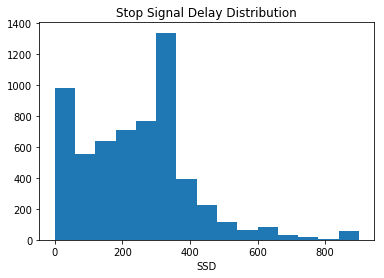

239.74036850921274

In [235]:
plt.hist(SSD, bins = 15)
plt.xlabel('SSD')
plt.title('Stop Signal Delay Distribution')
#SSDUR.value_counts()

plt.show()
mean_SSD = np.mean(SSD)
print(mean_SSD)

In [256]:
SST_concat.loc[SST_concat['SSDDur'] ==0 ][['SSDDur', 'StopSignal.RT', 'TrialCode', 'StopSignal.RESP']]

,SSDDur,StopSignal.RT,TrialCode,StopSignal.RESP
381,0.0,0.0,CorrectStop,NaN
1325,0.0,0.0,IncorrectStop,NaN
1336,0.0,0.0,IncorrectStop,NaN
1340,0.0,0.0,IncorrectStop,NaN
1344,0.0,0.0,IncorrectStop,NaN
1348,0.0,0.0,IncorrectStop,NaN
1353,0.0,0.0,CorrectStop,NaN
1837,0.0,0.0,CorrectStop,NaN
2176,0.0,0.0,CorrectStop,NaN
2808,0.0,0.0,CorrectStop,NaN


In [19]:
stop_nback = SST_concat.loc[SST_concat['Stop_nback'].isnull() == False]['Stop_nback']

In [20]:
x = np.arange(1,20, 1)
def my_dist(i):
    i = (1/6) * (5/6)**(i) 
    return(i)  
p = my_dist(x)

/Users/work/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


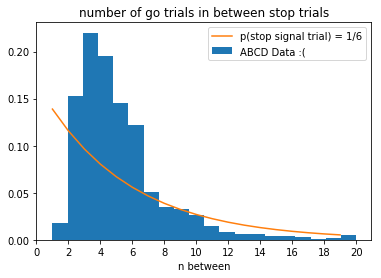

In [21]:
plt.hist(stop_nback, normed=True,bins = 20, label = 'ABCD Data :(')
plt.plot(x,p, label = 'p(stop signal trial) = 1/6')
plt.xlabel('n between')
plt.title('number of go trials in between stop trials')
plt.xticks(np.arange(0, 21, step=2))
plt.legend()

plt.show()

In [22]:
SST_diff = SST_concat.copy()
SST_diff = SST_diff[SST_diff['TrialCode'].isnull() == False | (SST_diff['TrialCode'] == 'BeginFix') | (SST_diff['TrialCode'] == 'EndFix')]
#$SST_diff = SST_diff.drop(SST_concat.loc[SST_concat['TrialCode'].isnull() == True], axis = 1)

In [23]:
#unnecessary for loop 
things_to_save = []
pre_stop_rt = []
post_stop_rt = [] 
for i in range(len(SST_diff['Go.RT'].values)):
    if np.isnan(SST_diff['Go.RT'].values[i]):
        pre_stop_rt.append(SST_diff['Go.RT'].values[i-1])
        post_stop_rt.append(SST_diff['Go.RT'].values[i+4])
pre_stop_rt = pd.Series(pre_stop_rt)
post_stop_rt = pd.Series(post_stop_rt)

IndexError: index 35821 is out of bounds for axis 0 with size 35820

post stop signal slowing?

In [522]:
prepost_list = pre_stop_rt - post_stop_rt

In [419]:
np.mean(pre_stop_rt) - np.mean(post_stop_rt)

14.166917922948073

apparently not! 

In [162]:
SSD_initial = []
for i in SST_concat['NARGUID'].unique(): 
    sub_df = SST_concat.loc[SST_concat['NARGUID'] == i]
    sub_df = sub_df.loc[sub_df['SSDDur'].isnull() == False]
    SSD_initial.append(sub_df['SSDDur'].iloc[0])
    

In [504]:
pd.Series(SSD_initial).value_counts() # this only accounts for the first SSD of the whole split session,
#but I visually inspected the rest - I just don' twant to try to figure out how 
#to programaticlaly pick out that middle session 



50.0    100
dtype: int64

probablilty of having a stop signal trial after a fast reseponse trial? 

In [227]:
np.mean(SST_concat.loc[SST_concat['SSD.RT'] >0]['SSD.RT']) 

/Users/work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


0.0

lets figure out this post stop slowing! 

In [177]:
stop_mask = SST_concat['StopSignal.ACC'].isnull() == False
stop_idx = stop_mask[stop_mask == True].index

In [178]:
stop_idx

Int64Index([    6,    12,    20,    23,    27,    33,    40,    51,    56,
               61,
            ...
            36789, 36792, 36797, 36802, 36808, 36813, 36821, 36826, 36830,
            36833],
           dtype='int64', length=5970)

In [180]:
stop_index = SST_concat['Go+Fix.RT'].loc[stop_mask].index
signal_slowing = SST_concat['Go+Fix.RT'].loc[stop_mask.shift(-1, fill_value = False)].reindex(stop_index, method='pad') \
 - SST_concat['Go+Fix.RT'].loc[stop_mask.shift(1, fill_value = False)].reindex(stop_index, method='backfill')
stop_subtrial = SST_concat['SubTrial'].loc[stop_mask]
print(len(stop_subtrial), len(signal_slowing))

5970 5970


In [181]:
signal_slowing[signal_slowing.isnull() == True].index
stop_subtrial = stop_subtrial.drop(signal_slowing[signal_slowing.isnull() == True].index)
signal_slowing = signal_slowing.dropna()
print(len(stop_subtrial), len(signal_slowing))

5936 5936


In [ ]:
SST_concat[['Go+Fix.RT', 'Go.RT']].loc[stop_mask.shift(1, fill_value = False)]

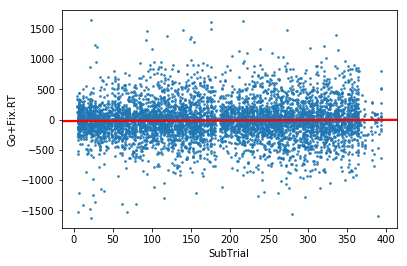

rval: 0.015871913276403814 pval: 0.2214513257781101


In [168]:
stop_diff = sns.regplot(x=stop_subtrial, y=signal_slowing, line_kws = {'color':'red'},
                        scatter_kws = {'s': 3})
plt.show()
stop_subtrial.corr(signal_slowing)
r, p = scipy.stats.pearsonr(x=stop_subtrial, y=signal_slowing)
print('rval:', r, 'pval:', p)

In [156]:
stop_subtrial.corr(signal_slowing)
r, p = scipy.stats.pearsonr(x=stop_subtrial, y=signal_slowing)
print('rval:', r, 'pval', p)

In [24]:
SST_concat['Go+Fix.RT'] = SST_concat['Go.RT'] + SST_concat['Fix.RT']

In [ ]:
for i in SST_concat.index.unique(): 
    sub = SST_concat.loc[SST_concat.index == i]
    print(len(sub))

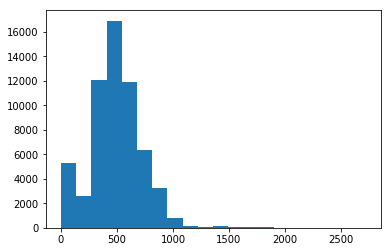

In [557]:
plt.hist(SST_concat['Go+Fix.RT'].loc[~pd.isnull(SST_concat['Go+Fix.RT'].values)], bins = 20) 
plt.show()